## Algoritmo de Aprendizaje No Supervisado
## Modelo de Hierarchical Clustering

In [29]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Cargar el data set para analizarlo y ajustarlo
df = pd.read_csv('./Mall_Customers.csv')

## Análisis Exploratorio de Datos

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Hay 5 variables
CustomerID, Gender, Age, Annual Income (k$) y Spending Score (1-100)


In [8]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Información sobre tipos de datos y valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


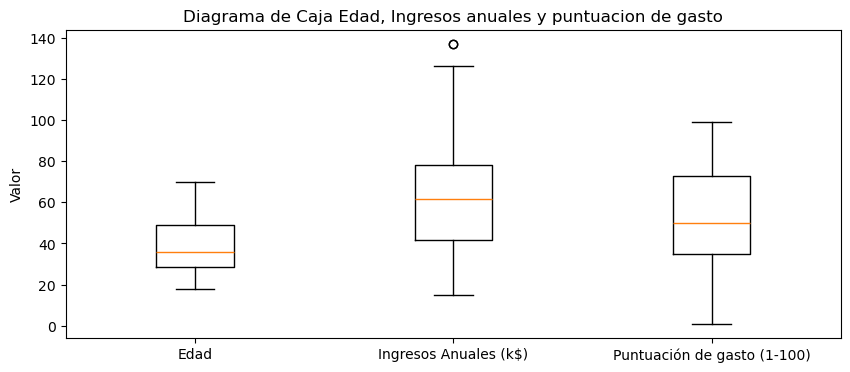

In [12]:
#Identificación de Datos Faltantes (No hay) y Atípicos
# Diagramas de caja para detectar valores atípicos para variables entre 0 y 16
plt.figure(figsize=(10, 4))
plt.boxplot([df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']], 
        labels=['Edad', 'Ingresos Anuales (k$)', 'Puntuación de gasto (1-100)'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja Edad, Ingresos anuales y puntuacion de gasto')
plt.show()

Solo muestra valores atípicos en Ingresos anuales, para lo cual se realizó el gráfico de cajas solo para los ingresos anuales

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [14]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [16]:
# Se verifica la existencia de registros duplicados
print(f' Cantidad de registros duplicados es: ', df.duplicated().sum())

 Cantidad de registros duplicados es:  0


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Para este modelo se utilizarán las características de:
Age (Edad)
Annual Income (k$) (Ingresos anuales) 
Spending Score (1-100) (Puntuación de Gasto)

In [20]:
# Elimino o filtro las columnas a trabajar
df_filtrado = df.drop(['Gender', 'CustomerID'], axis=1)

In [22]:
# Verifico las variables a trabajar en el modelo
df_filtrado.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
# Identifico relaciones entre las variables
print(df_filtrado.corr())

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


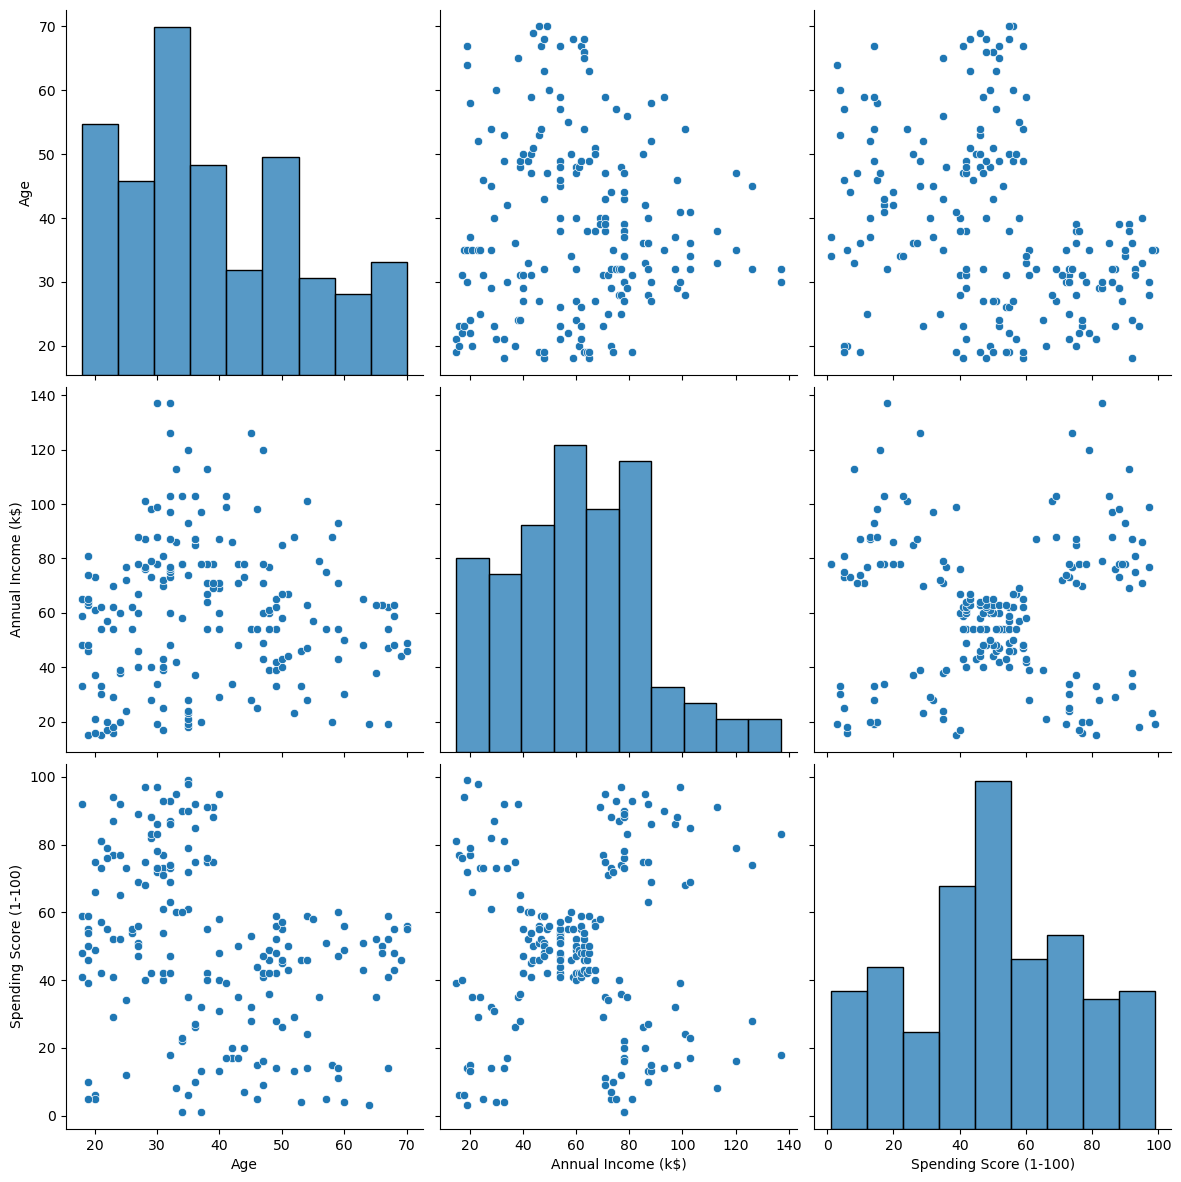

In [26]:
# Grafico esas relaciones
sns.pairplot(df_filtrado, size=4, kind='scatter')

## 4. Entrenar el modelo - Hierarchical Clustering


In [33]:
# Estandarizar los datos antes de aplicar Hierarchical Clustering
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_filtrado), columns = df_filtrado.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [351]:
# Determinar el número de clusters a utilizar mediante el dendograma

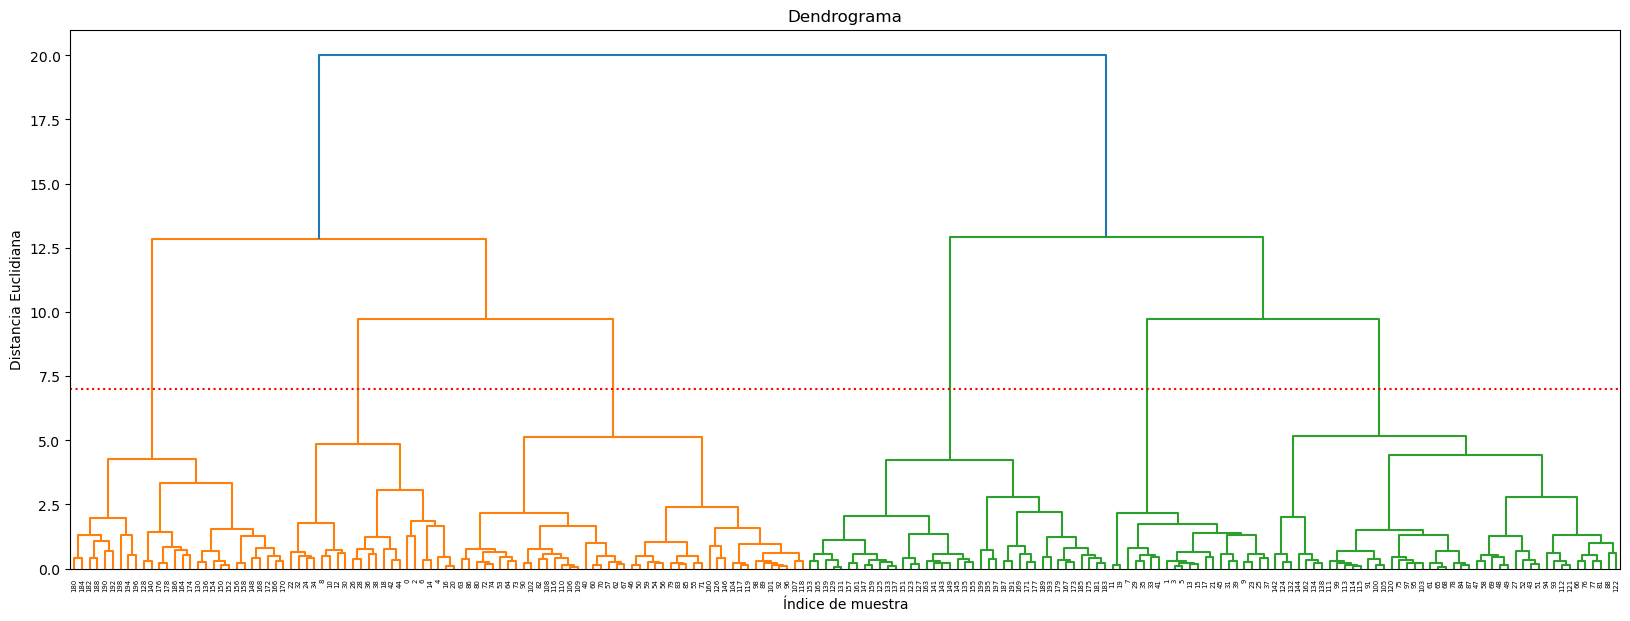

In [41]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 7, color = 'r', linestyle = ':')
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia Euclidiana')
plt.show()

''' Al analizar el dendograma se pueden identificar los saltos más significativos en la altura de las uniones 
en las alturas de 5 y 10 unidades aproximadamente, por lo cual se trazó la línea horizontal a la altura de 7
unidades, notando que la misma cruza 6 líneas verticales, lo cual quiere decir que este es el número óptimo
de clústeres para entrenar el modelo.'''

In [92]:
# Se define el modelo de agrupamiento con 6 clusters, se ajusta y se realiza la predicción de etiquetas
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [ ]:
# Método silhouette para identificar el número óptimo de clusters

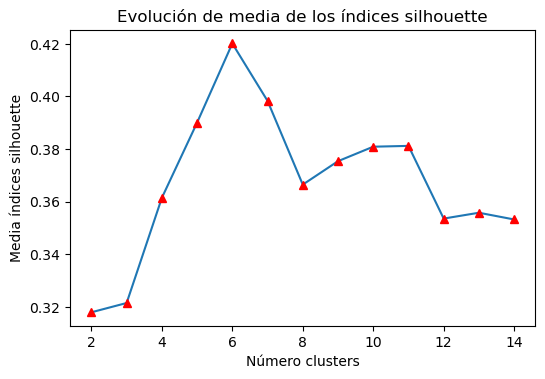

In [118]:
# Se inicializan variables
mejorModeloH = None
mejorSilueta = 0

range_n_clusters = range(2, 15) # Rango de valores para n_clusters
resultados = [] # Lista para almacenar los resultados


# Ciclo para evaluar el modelo con diferentes valores de clúster
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    
     # Calcular medidas de calidad para el modelo

    puntaje_silueta = metrics.silhouette_score(X, cluster_labels)
    indice_calinski_harabasz = metrics.calinski_harabasz_score(X, cluster_labels)
    indice_davies_bouldin = metrics.davies_bouldin_score(X, cluster_labels)

    resultados.append({
        'Clusters': n_clusters,
        'Silhouette': puntaje_silueta,
        'Calinski-Harabasz': indice_calinski_harabasz,
        'Davies-Bouldin': indice_davies_bouldin
    })
       
    # Condicional para guardar el mejor modelo
    if puntaje_silueta > mejorSilueta:
        mejorSilueta = puntaje_silueta
        mejorModeloH = modelo

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, resultados_df['Silhouette'], marker='^', markerfacecolor='red', markeredgecolor='red')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

De acuerdo a los resultados, el mejor modelo es con 6 clusters, identificado en el Dendograma y a través de los índices de silhouette

In [122]:
# Se define el modelo de agrupamiento con 6 clusters, se ajusta y se realiza la predicción de etiquetas
# Se toma el mejor modelo del ciclo de evaluación realizado en el ciclo anterior
labels_hier = mejorModeloH.fit_predict(X)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

## Evaluar el modelo

Para la evaluación del modelo primero imprimo las métricas para el mejor modelo (6 clusters) y podemos utilizar los resultados del bucle que se realizó para determinar el mejor número de clusters, ya que allí se creó una lista que aloja los resultados de cada uno.

In [131]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print('Número de observaciones: ', len(df))
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Número de observaciones:  200
Puntaje de silueta: 0.4201169558789579
Índice de Calinski-Harabasz: 127.98645433956887
Davies-Bouldin Index: 0.8521020845733146


Comparación del modelo con diferentes números de clusters

In [126]:
print(resultados_df) # Impresión de los resultados

    Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0          2    0.317957          99.000668        1.308296
1          3    0.321489          88.101741        1.127729
2          4    0.361451         102.019399        1.016382
3          5    0.390028         107.826560        0.916289
4          6    0.420117         127.986454        0.852102
5          7    0.398295         120.686805        0.851329
6          8    0.366479         118.066796        0.841587
7          9    0.375385         117.475123        0.858235
8         10    0.380889         117.221895        0.885471
9         11    0.381198         118.548799        0.921740
10        12    0.353572         122.381270        0.979342
11        13    0.355790         121.943615        0.948789
12        14    0.353230         121.436643        0.949264


In [133]:
# Calcular el coeficiente de correlación cofenética
#from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6261774947075186, array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))


Se puede observar que existe una correspondencia moderada entre las distancias originales y aquellas representadas en el dendograma, indicando de esta manera que el dendograma es aceptable en cuanto a la reprentación realizada, puesto que el valor ideal es 1 y se obtuvo un 0,63 aproximadamente.

## Realizar las gráficas que visualizan los resultados del modelo

Grafico cada una de las posibles relaciones para verificar su agrupamiento

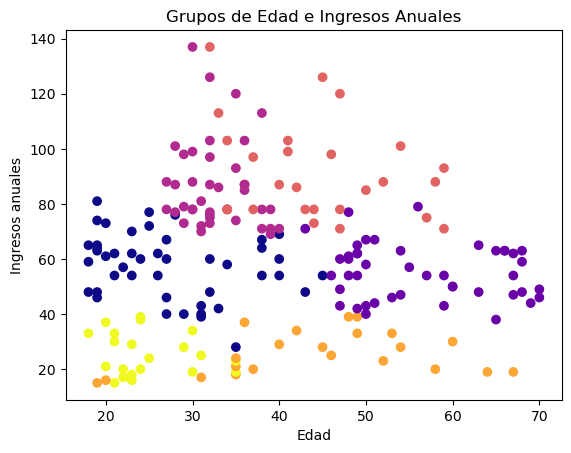

In [156]:
# Crear el scatter plot para los puntos
scatter = plt.scatter(df_filtrado['Age'], df_filtrado['Annual Income (k$)'], c=labels_hier, cmap='plasma')

#plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales')
plt.title('Grupos de Edad e Ingresos Anuales')
plt.show()

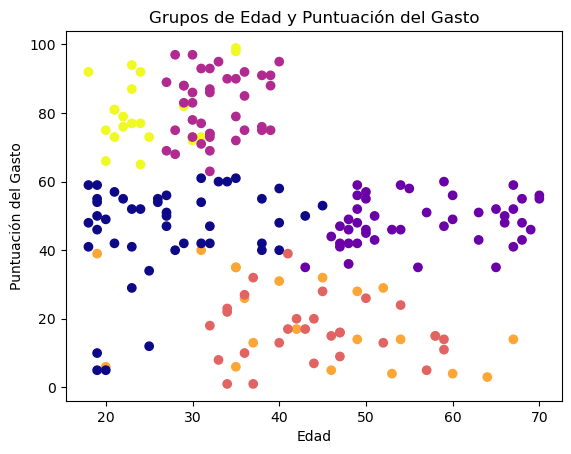

In [166]:
# Grafico cada una de las posibles relaciones para verificar su agrupamiento

# Crear el scatter plot para los puntos
plt.scatter(df_filtrado['Age'], df_filtrado['Spending Score (1-100)'], c=labels_hier, cmap='plasma')

#plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Edad')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Edad y Puntuación del Gasto')
plt.show()

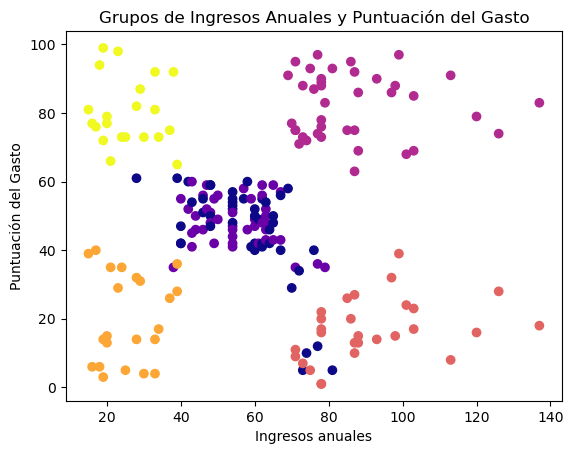

In [174]:
# Grafico cada una de las posibles relaciones para verificar su agrupamiento

# Crear el scatter plot para los puntos
plt.scatter(df_filtrado['Annual Income (k$)'], df_filtrado['Spending Score (1-100)'], c=labels_hier, cmap='plasma')

#plt.scatter(C[:,0], C[:,1], marker='+', color='red', s=200)
plt.xlabel('Ingresos anuales')
plt.ylabel('Puntuación del Gasto')
plt.title('Grupos de Ingresos Anuales y Puntuación del Gasto')
plt.show()

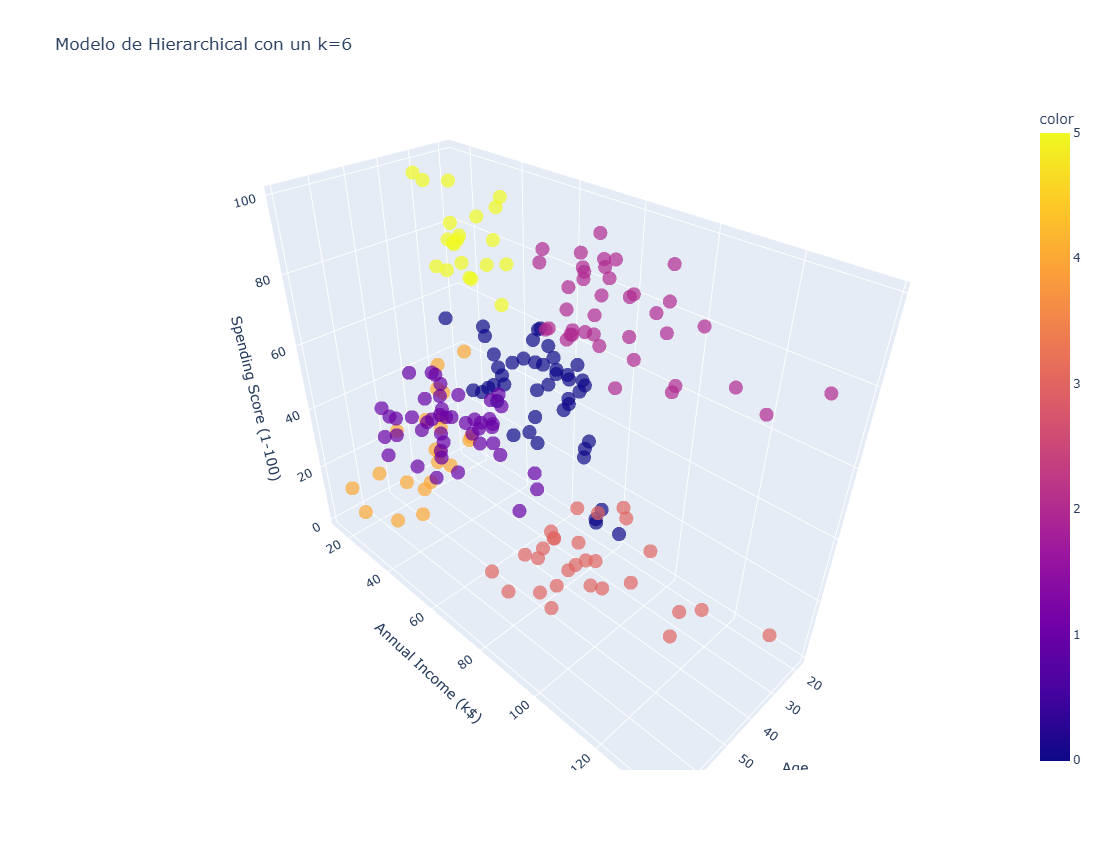

In [176]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(df_filtrado, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=labels_hier, symbol=labels_hier, symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle', 6: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de Hierarchical con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

# Interpretación de resultados

De acuerdo con los resultados, el mejor modelo es aquel en el que se utilizan 6 clusters, ya que es el que mejor resultado de Coeficiente de Silhouette arroja, así mismo, es la cantidad determinada mediante el Dendograma. En cuanto al valor logrado con la métrica de Silhouette su puntuación fue de 0,42 lo cual nos indica que los puntos se encuentran razonablemente bien agrupados, pero no es óptima esa agrupación, ya que puede presentarse superposición entre grupos, pero para el modelo fue el mejor resultado.Ahora bien, para el  índice de Calinski-Harabasz, el valor más alto fue127.988 lo cual indica que en este modelo comparado con los otro3, es el que mejor separacióninter  clústerestiene  yel que representa  mejor cohesión dentro los mismoe, por lo tanto, es donde están mejor definidos los clústeres.En cuanto al l índice de Davies Bouldin, que también sirve para evaluar la calidad de un agrupamiento del modelo, esta métrica nos da un valor d0.852 75 que al compararlo con los otros resultadono s es la mejorpuesto que con 7 y 8 clusters se dieron valores menors que corresponden a 0.851 y  0.84 respectivamente, sin embargo, las diferencias no son mayores e igualmente demuestran resultados aceptables para el modelo con 6 clusters.s.
